In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [8]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [9]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [10]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [11]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

2016-08-23


<function matplotlib.pyplot.show(*args, **kw)>

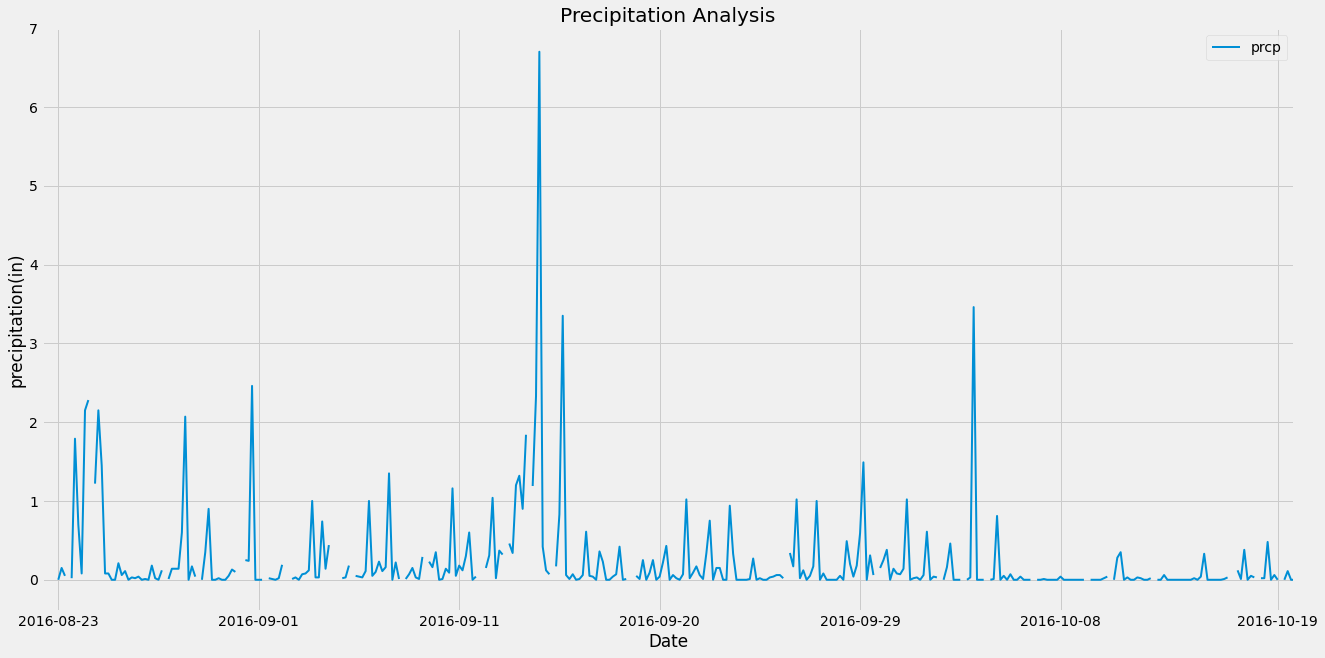

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017,8,23) - dt.timedelta(days=365)
print(one_year)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(
    Measurement.date, Measurement.prcp).filter(
    Measurement.date >= one_year).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df=pd.DataFrame(precipitation_data, columns=['date', 'prcp'])
precipitation_df.set_index('date', inplace=True)

# Sort the dataframe by date
precipitation_df.sort_values('date')
precipitation_df.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot(linewidth=2,alpha=1,rot=0, 
             xticks=(0,60,120,180,240,300,365))
plt.rcParams['figure.figsize']=(40,20)
plt.xlim(-5,370)
plt.ylim(-0.4,7)
plt.xlabel('Date')
plt.ylabel('precipitation(in)')
plt.title('Precipitation Analysis')
plt.show


In [23]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [24]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()
total_stations

9

In [25]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(
            Measurement.station)).group_by(
            Measurement.station).order_by(
            func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]


active=(session.query(*sel)
                       .filter(Measurement.station=='USC00519281')
                       .all())
active

most_active_st_temp=pd.DataFrame(active, columns=['min_temp','max_temp', 'avg_temp'])
most_active_st_temp.reset_index(drop=True, inplace=True)
most_active_st_temp

,min_temp,max_temp,avg_temp
0,54.0,85.0,71.663781


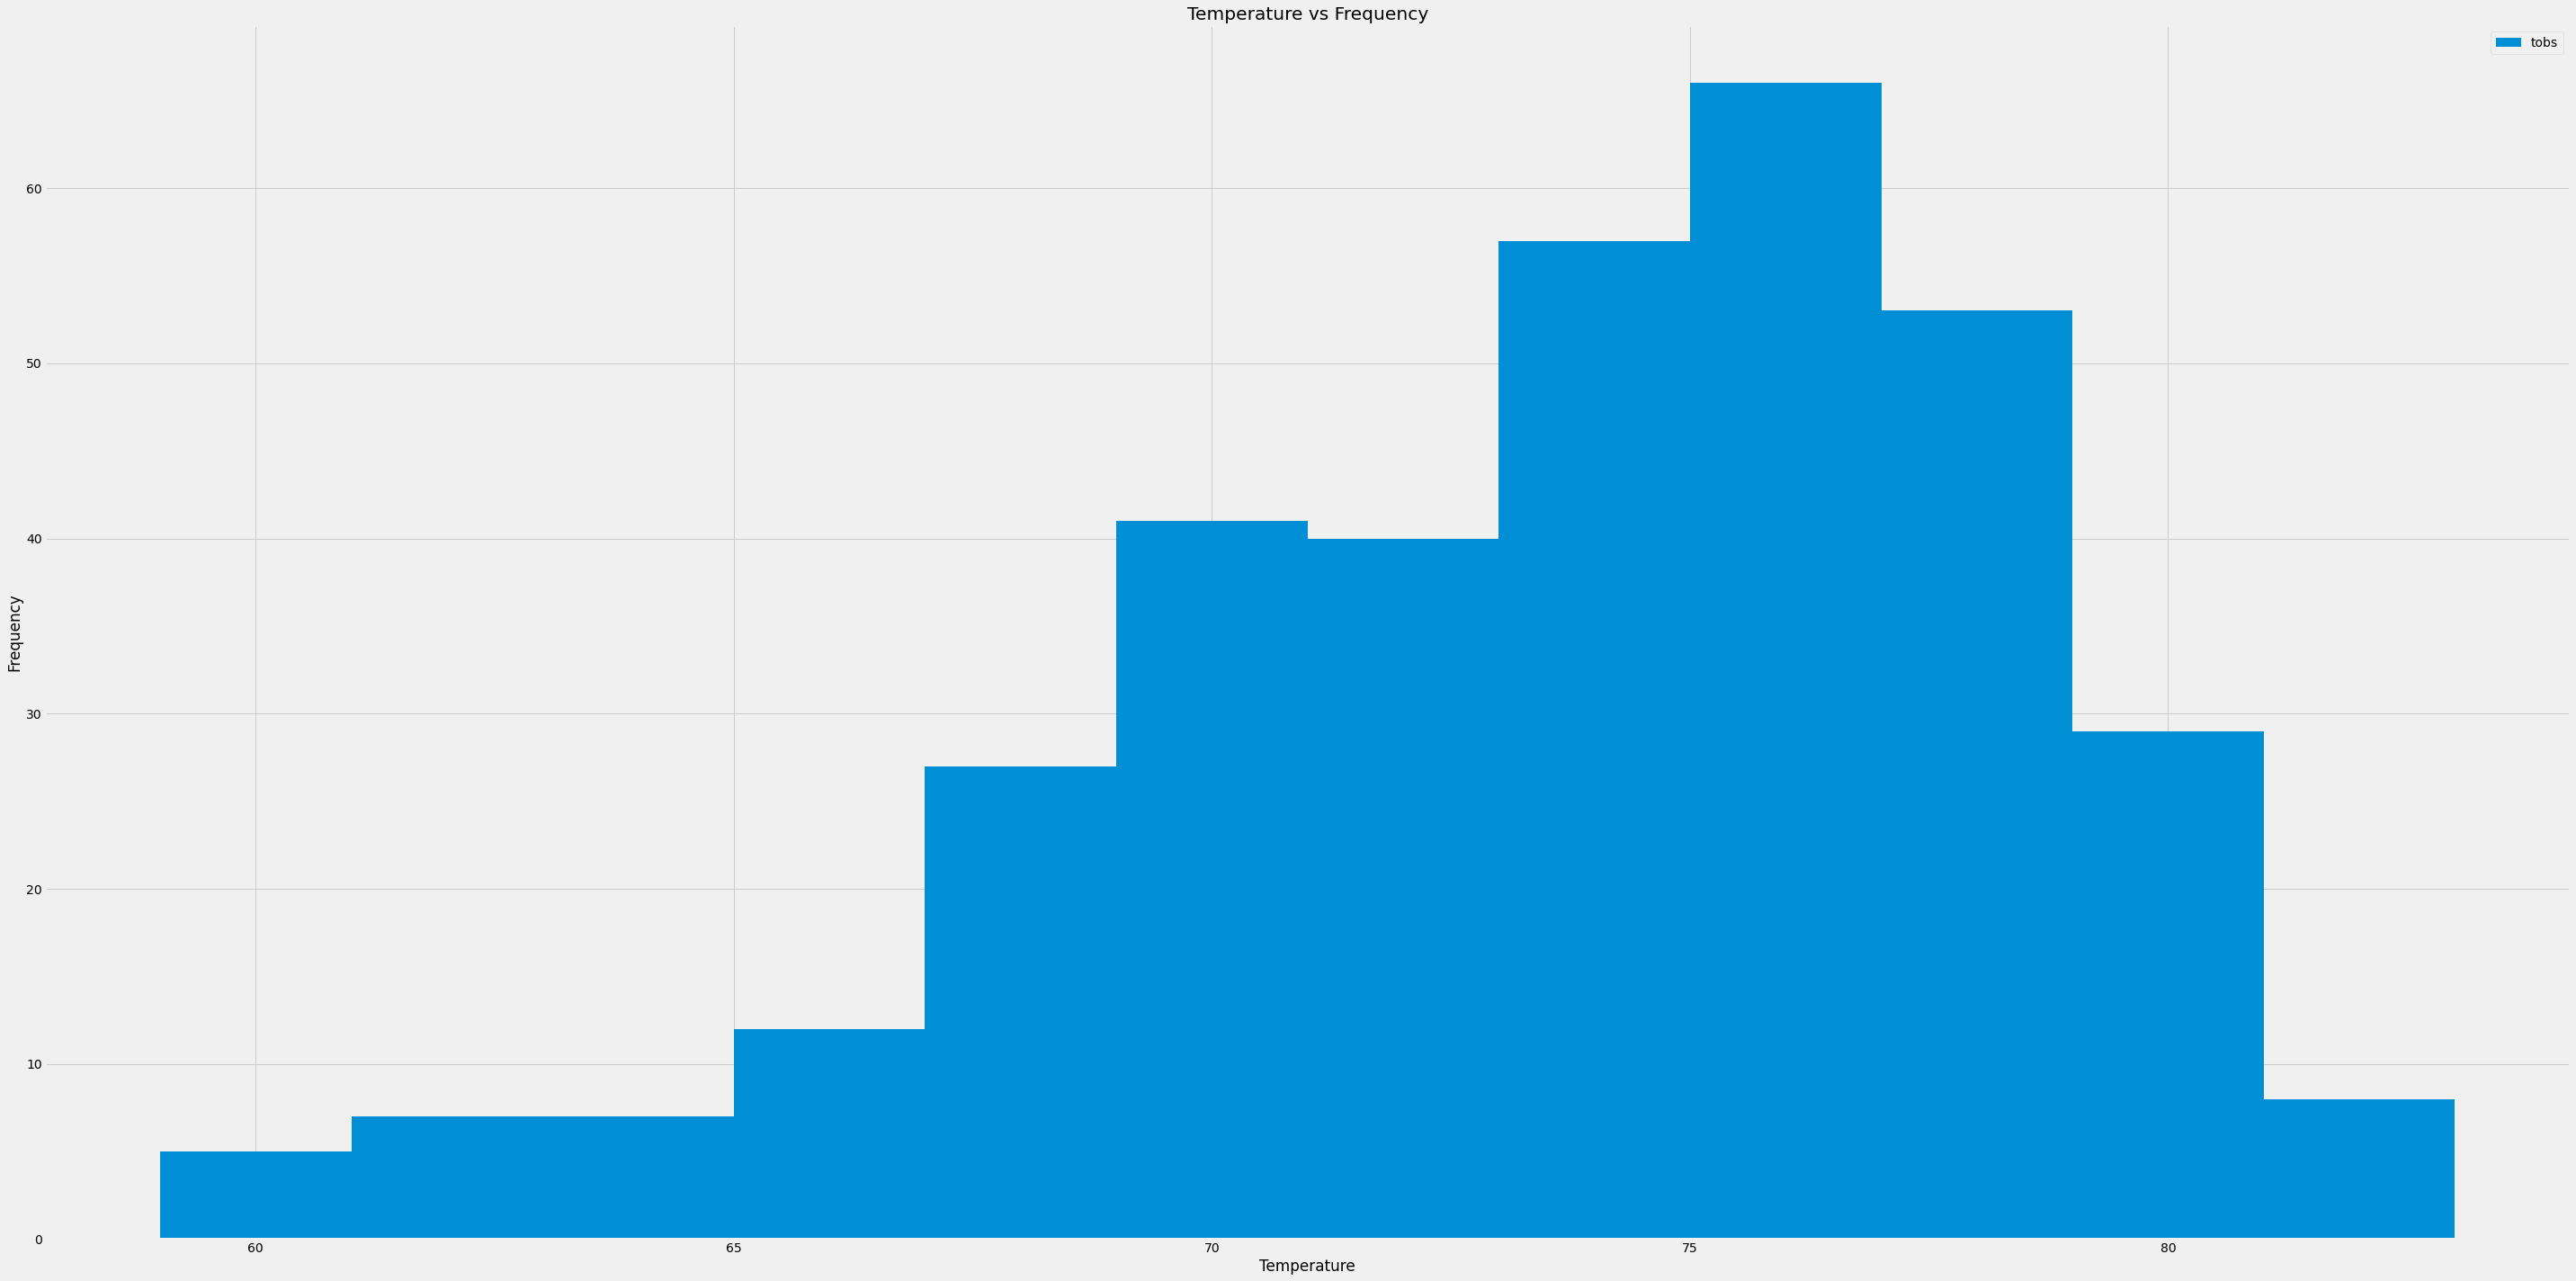

In [32]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

active_station_data_df =pd.DataFrame(active_station_data)
active_station_data_df

active_station_data_df.plot.hist(bins=12, title='Temperature vs Frequency')
plt.xlabel("Temperature")
plt.tight_layout()
plt.show()

# Close session

In [33]:
# Close Session
session.close()